# New regimes of Josephson junction arrays

In [1]:
import JJArray as jja
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.sparse import bmat
from tqdm.notebook import tqdm

# Full Hamiltonian

In [24]:
N = 3
Ncut = 2

EC = np.full((N), 0.1)
EJ = np.full((N), 0.1)
EJb = 10
ECb = 0.5
phi = 0.

H = jja.H_array(phi, N , Ncut, EJ, EC, EJb, ECb)

# Setup of the system by symmetry sectors

Generate unitary transformations for each symmetry sector

In [25]:
%time V = jja.ChargeToTranslation(N,Ncut)

Full Hilbert space dimension =  125


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Sector 0= 45


  0%|          | 0/45 [00:00<?, ?it/s]

Sector 1= 40


  0%|          | 0/45 [00:00<?, ?it/s]

Sector 2= 40
Sum of sector dimensions =  125
CPU times: user 114 ms, sys: 20.7 ms, total: 134 ms
Wall time: 121 ms


In [40]:
ph_list = np.linspace(0,1,20)

scan = {}
[scan.update({k:[]}) for k in range(N)]

for ph in tqdm(ph_list):
    
    H = jja.H_array(ph, N , Ncut, EJ, EC, EJb, ECb)
    evals, evecs, symmetric_data = jja.SortedDiagonalization(H,V,10)
    [scan[k].append(symmetric_data[k][0]) for k in range(N)]    

  0%|          | 0/20 [00:00<?, ?it/s]

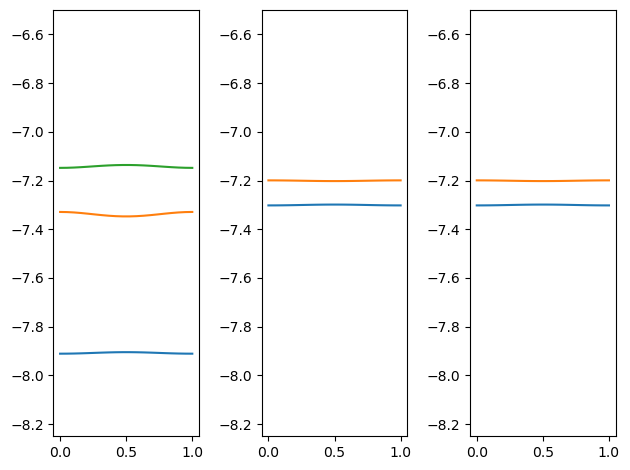

In [41]:
fig, ax = plt.subplots(1,N)

[ax[r].plot(ph_list,np.array(scan[r])) for r in range(N)];
[ax[r].set_ylim([-8.25,-6.5]) for r in range(N)]
# [ax[r].set_xticks([]) for r in range(N)]

fig.tight_layout()

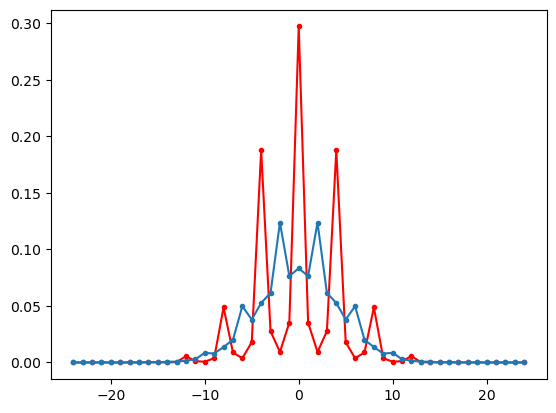

In [13]:
bs = jja.cartesian([np.arange(-Ncut,Ncut+1) for r in range(N)])
chrgs = np.array([np.sum(bs[r]) for r in range(len(bs))])

state = evecs[0]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'r.-')

state = evecs[1]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'.-')

## Check block-diagonal form of the Hamiltonian in the symmetric basis (use small N, Ncut for safety)

In [31]:
H_V = bmat([[V[i].dag()*H*V[j] for j in range(N)] for i in tqdm(range(N))])

  0%|          | 0/3 [00:00<?, ?it/s]

Text(0.5, 1.0, 'H in the symmetric basis')

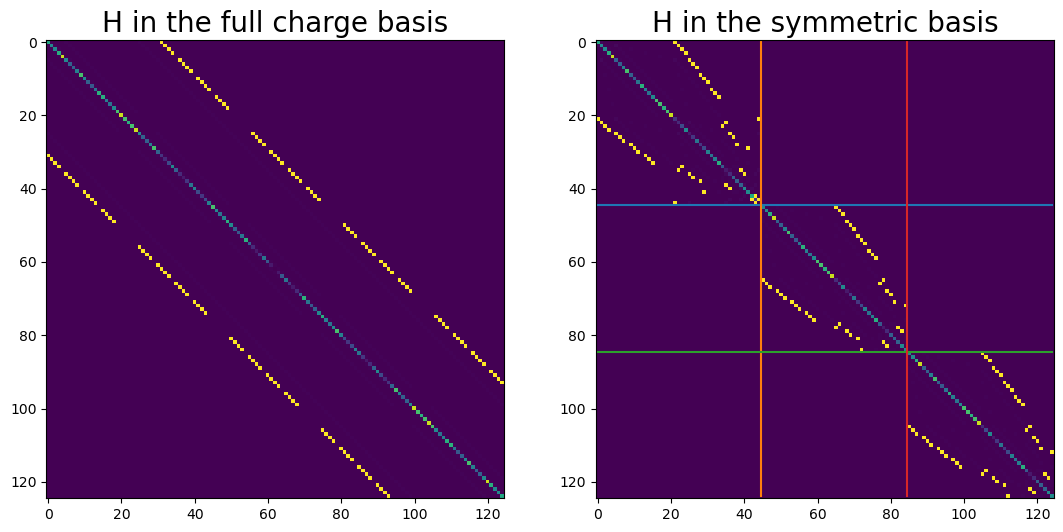

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,13))


ax1.imshow(np.abs(H.full()))
ax1.set_title('H in the full charge basis', size = 20)

ax2.imshow(np.abs(H_V.toarray()))

sm = V[0].shape[1]
for i in range(1,N):
    ax2.plot(np.arange(0,H.shape[0]),(sm-0.5)*np.ones(H.shape[0]))
    ax2.plot((sm-0.5)*np.ones(H.shape[0]),np.arange(0,H.shape[0]))
    sm = sm + V[i].shape[1]
    
ax2.set_title('H in the symmetric basis', size = 20)